p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B: p=0.001


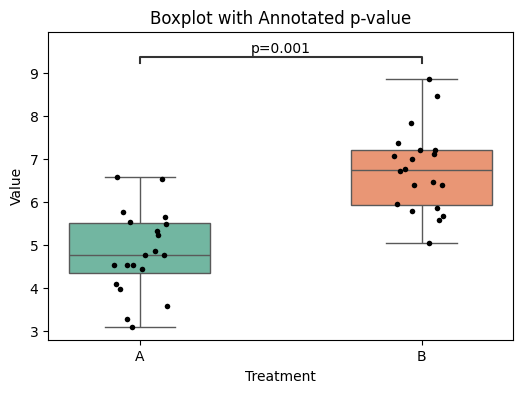

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Generate mock data
np.random.seed(42)  # For reproducibility
data = {
    'Treatment': ['A'] * 20 + ['B'] * 20,
    'Value': np.concatenate([np.random.normal(5, 1, 20), np.random.normal(7, 1, 20)])
}
df = pd.DataFrame(data)

order = ['A', 'B']
pairs = [("A", "B")]

plt.figure(figsize=(6, 4))
# Use hue to avoid deprecation warning and remove the legend for the same effect
ax = sns.boxplot(
    data=df,
    x='Treatment',
    y='Value',
    hue='Treatment',
    palette='Set2',
    order=order,
    width=0.5,
    linewidth=1,
    showfliers=False
)
# Remove the legend since hue is now assigned to 'Treatment'
#ax.get_legend().remove()

# Overlay the stripplot
sns.stripplot(
    data=df,
    x='Treatment',
    y='Value',
    order=order,
    color='black',
    size=4,
    jitter=True
)

# Configure and apply the statistical annotation
pvalues = [0.001]
formatted_pvalues = [f"p={p:.3f}" for p in pvalues]
annotator.set_custom_annotations(formatted_pvalues)
annotator.annotate()

annotator = Annotator(ax, pairs, data=df, x='Treatment', y='Value', order=order)
annotator.set_custom_annotations(formatted_pvalues)
annotator.annotate()

plt.title("Boxplot with Annotated p-value")
plt.show()
